In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Leitura de arquivos CSV 
daily_activity = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\dailyActivity_merged.csv")

In [3]:
# heartrate_seconds = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\heartrate_seconds_merged.csv")
# hourly_calories = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlyCalories_merged.csv")
# hourly_intensities = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlyIntensities_merged.csv")
# hourly_steps = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\hourlySteps_merged.csv")
# minutes_calories = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteCaloriesNarrow_merged.csv")
# minutes_intensities = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteIntensitiesNarrow_merged.csv")
# minutes_mets = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteMETsNarrow_merged.csv")
# minutes_sleep = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteSleep_merged.csv")
# minute_steps = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\minuteStepsNarrow_merged.csv")
# weightLog_info = pd.read_csv(r"C:\Users\ddaay\fitbit_data\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16\weightLogInfo_merged.csv")

In [34]:
# Lista de DFS
dfs = {
    'daily_activity': daily_activity,
    # 'heartrate_seconds': heartrate_seconds,
    # 'hourly_calories': hourly_calories,
    # 'hourly_intensities': hourly_intensities,
    # 'hourly_steps': hourly_steps,
    # 'minutes_calories': minutes_calories,
    # 'minutes_intensities': minutes_intensities,
    # 'minutes_mets': minutes_mets,
    # 'minutes_sleep': minutes_sleep,
    # 'minute_steps': minute_steps,
    # 'weightLog_info': weightLog_info
}

In [35]:
#Transformando no formato DateTime
datetime_columns = {
    "daily_activity": "activity_date",
    # "heartrate_seconds": "Time",
    # "hourly_calories": "ActivityHour",
    # "hourly_intensities": "ActivityHour",
    # "hourly_steps": "ActivityHour",
    # "minutes_calories": "ActivityMinute",
    # "minutes_intensities": "ActivityMinute",
    # "minutes_mets": "ActivityMinute",
    # "minutes_sleep": "date",
    # "minute_steps": "ActivityMinute",
    # "weightLog_info": "Date"
}

In [36]:
list(daily_activity.columns)

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

In [37]:
#Padronização de nomes de colunas (snake_case)
daily_activity.columns = [
    'id',
    'activity_date',
    'total_steps',
    'total_distance',
    'tracker_distance',
    'logged_activities_distance',
    'very_active_distance',
    'moderately_active_distance',
    'light_active_distance',
    'sedentary_active_distance',
    'very_active_minutes',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes',
    'calories'
]


In [38]:
#Transformando no formato DateTime
for df_str, col_str in datetime_columns.items():
    try:
        globals()[df_str][col_str] = pd.to_datetime(globals()[df_str][col_str], errors='raise')
        print(f"{df_str} -> coluna '{col_str}' convertida com sucesso!")
    except Exception as e:
        print(f"Erro ao converter {df_str}.{col_str}: {e}")

daily_activity -> coluna 'activity_date' convertida com sucesso!


In [167]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          940 non-null    int64         
 1   date                        940 non-null    datetime64[ns]
 2   total_steps                 940 non-null    int64         
 3   total_distance              940 non-null    float64       
 4   tracker_distance            940 non-null    float64       
 5   logged_activities_distance  940 non-null    float64       
 6   very_active_distance        940 non-null    float64       
 7   moderately_active_distance  940 non-null    float64       
 8   light_active_distance       940 non-null    float64       
 9   sedentary_active_distance   940 non-null    float64       
 10  very_active_minutes         940 non-null    int64         
 11  fairly_active_minutes       940 non-null    int64         

In [39]:
# # Aplica para cada DataFrame
# for df_name, datetime_col in datetime_columns.items():
#     df = globals()[df_name]  
#     if datetime_col in df.columns:
#         df['date'] = pd.to_datetime(df[datetime_col]).dt.date
#         # Adiciona a coluna 'Hour' se tiver informação de hora (TimeStamp com hora, tipo datetime completo)
#         if pd.api.types.is_datetime64_any_dtype(df[datetime_col]):
#             if not all(df[datetime_col].dt.time == pd.to_datetime(df[datetime_col].dt.date).dt.time):  # se tem hora
#                 df['hour'] = pd.to_datetime(df[datetime_col]).dt.time


In [40]:
#Verifica o tempo que a análise vai ser aplicada
first_date = daily_activity['activity_date'].min()
print("Primeira Data", first_date)
last_date = daily_activity['activity_date'].max()
print("Última Data", last_date)

Primeira Data 2016-04-12 00:00:00
Última Data 2016-05-12 00:00:00


In [43]:
# Loop para verificar duplicatas
for name, df in dfs.items():
    duplicatas = df.duplicated().sum()
    print(f"{name}: {duplicatas} duplicatas")

daily_activity: 0 duplicatas


In [44]:
# Loop para verificar se existem valores nulos
for name, df in dfs.items():
    nulos = df.isnull().values.sum()
    print(f"{name}: {nulos} nulos")

daily_activity: 0 nulos


In [45]:
df.rename(columns={'activity_date':'date'},inplace=True)
df.head(5)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [46]:
daily_activity.id.nunique()

33

In [47]:
daily_activity["day_name"] = daily_activity["date"].dt.day_name()

daily_activity["day_name"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day_name, dtype: object

In [48]:
df.head(5)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_name
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [49]:
daily_activity['total_minutes'] = daily_activity['very_active_minutes'] + daily_activity['fairly_active_minutes'] + daily_activity['sedentary_minutes']
daily_activity.head()

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_name,total_minutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,766
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,816
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1259
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,789
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,819


In [50]:
# create new column *total_hours* by converting to hour and round float to two decimal places
daily_activity["total_hours"] = round(daily_activity["total_minutes"] / 60)

# print 1st 5 rows to confirm
daily_activity.head(5)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_name,total_minutes,total_hours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,766,13.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,816,14.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1259,21.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,789,13.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,819,14.0


In [70]:
media_por_dia_calorias = df.groupby('date')['calories'].mean()
# print(media_por_dia_calorias)

In [53]:
contagem_ids = daily_activity['id'].value_counts()
agrupado = contagem_ids.value_counts().sort_index()
print(agrupado)

count
4      1
18     1
19     1
20     1
26     2
28     1
29     2
30     3
31    21
Name: count, dtype: int64


%63,6 dos usuários entraram no aplicativo durante todo o período

In [83]:
# Contar quantas vezes cada Id aparece
df_uso = daily_activity.groupby('id').size().reset_index(name='total_logged_uses')

# Classificar o tipo de usuário com base no total de usos
df_uso['fitbit_usage_type'] = pd.cut(
    df_uso['total_logged_uses'],
    bins=[0, 14, 26, 31],
    labels=['Light User', 'Moderate User', 'Active User']
)

# print(df_uso)

In [84]:
# Contar a quantidade de usuários por tipo de uso
contagem = df_uso['fitbit_usage_type'].value_counts().sort_index()

# Calcular a porcentagem
porcentagem = (contagem / contagem.sum()) * 100

# Juntar em um DataFrame
resumo = pd.DataFrame({
    'quantidade': contagem,
    'porcentagem': porcentagem.round(2).astype(str) + '%'
})

print(resumo)

                   quantidade porcentagem
fitbit_usage_type                        
Light User                  1       3.03%
Moderate User               5      15.15%
Active User                27      81.82%


C:\Users\ddaay\AppData\Local\Temp\ipykernel_6784\3466132905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


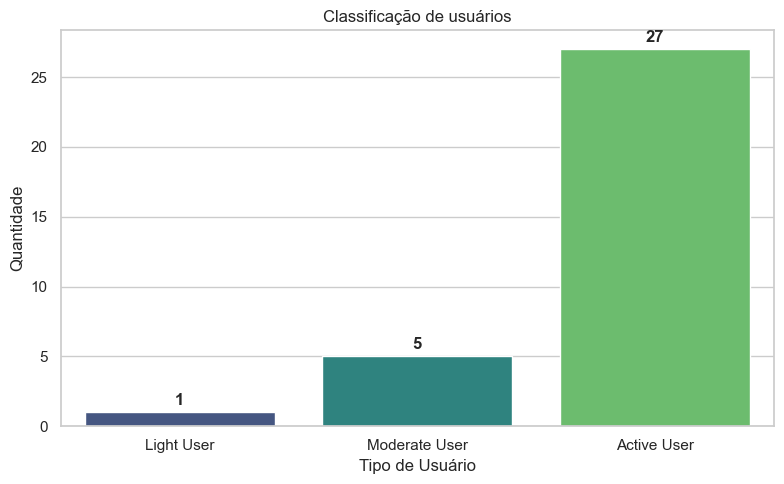

In [82]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=resumo.index,
    y='quantidade',
    data=resumo,
    palette='viridis'
)

# Adicionar os rótulos no topo das barras
for i, v in enumerate(resumo['quantidade']):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Título e rótulos
plt.title('Classificação de usuários')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

In [ ]:
#Frequência de registros de usuários por dia da semana
frequencia_dias = daily_activity.groupby('day_name')['id'].count().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(frequencia_dias)

day_name
Monday       120
Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Name: id, dtype: int64


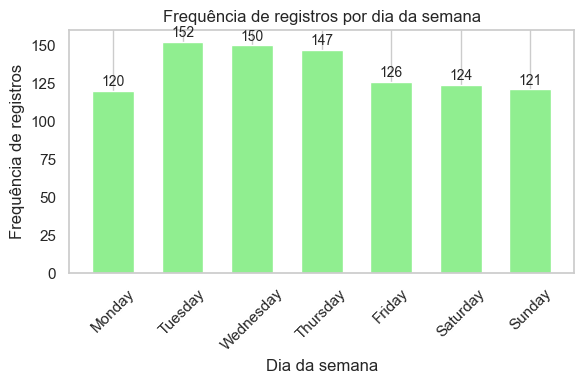

In [124]:
plt.figure(figsize=(6,4))
bars = plt.bar(frequencia_dias.index, frequencia_dias.values, color='lightgreen', width=0.6)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title("Frequência de registros por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Frequência de registros")
plt.tight_layout()
plt.show()

We notice that people are very active in tuesday, wednesday, and thursday, so we can send motivation message for people in the other days

In [133]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

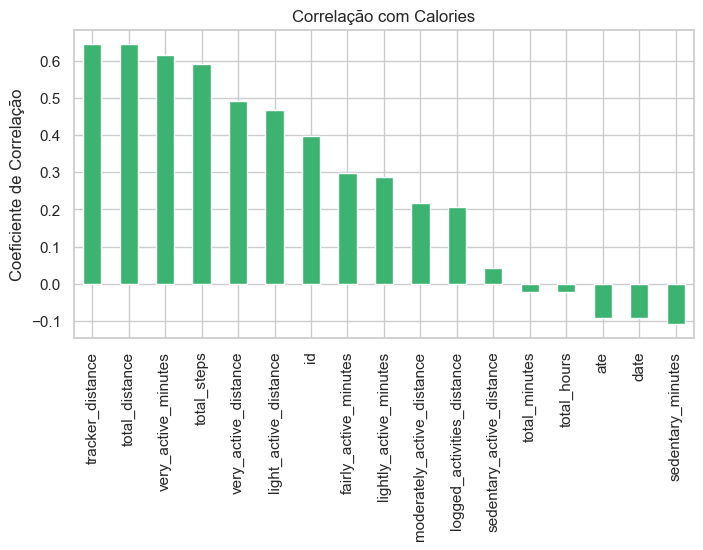

In [150]:
correlation = df[numerical_columns].corr()['calories'].sort_values(ascending=False)

correlation.drop('calories').plot(kind='bar', figsize=(8,4), color='mediumseagreen')
plt.title('Correlação com Calories')
plt.ylabel('Coeficiente de Correlação')
plt.show()

In [156]:
correlacao = df['calories'].corr(df['total_steps'])
print(f"Correlação entre Calories e TotalSteps: {correlacao:.2f}")

correlacao = df['calories'].corr(df['very_active_minutes'])
print(f"Correlação entre Calories e VeryActiveMinutes: {correlacao:.2f}")

correlacao = df['calories'].corr(df['total_distance'])
print(f"Correlação entre Calories e Distância Total: {correlacao:.2f}")

correlacao = df['calories'].corr(df['sedentary_minutes'])
print(f"Correlação entre Calories e Minutos Sedentários: {correlacao:.2f}")


Correlação entre Calories e TotalSteps: 0.59
Correlação entre Calories e VeryActiveMinutes: 0.62
Correlação entre Calories e Distância Total: 0.64
Correlação entre Calories e Minutos Sedentários: -0.11


Ambos têm correlação positiva moderada com Calories.

Mas VeryActiveMinutes está ligeiramente mais correlacionado com as calorias queimadas do que apenas o número total de passos.

Isso faz sentido: o tempo gasto em atividade intensa tem mais impacto direto nas calorias do que só a quantidade de passos (que pode incluir passos leves também).

Isso mostra que a distância total percorrida ao longo do dia é um ótimo indicador de gasto calórico

TotalDistance (0.64): Há uma forte correlação positiva — quanto maior a distância percorrida, mais calorias são queimadas.

VeryActiveMinutes (0.62): Também mostra uma forte correlação — períodos de atividade intensa impactam diretamente no gasto calórico.

TotalSteps (0.59): Boa correlação positiva — mais passos ao longo do dia tendem a aumentar as calorias gastas.

SedentaryMinutes (-0.11): Correlação negativa fraca — quanto mais tempo sedentário, ligeiramente menor o gasto calórico.

In [184]:
media_very_active = df['very_active_minutes'].mean()
print(f"Média de minutos muito ativos: {media_very_active:.2f}")

media_fairly_active = df['fairly_active_minutes'].mean()
print(f"Média de minutos moderadamente ativos: {media_fairly_active:.2f}")

media_lightly_active = df['lightly_active_minutes'].mean()
print(f"Média de minutos levemente ativos: {media_lightly_active:.2f}")

media_sedentary = df['sedentary_minutes'].mean()
print(f"Média de minutos sedentários: {media_sedentary:.2f}")


Média de minutos muito ativos: 21.16
Média de minutos moderadamente ativos: 13.56
Média de minutos levemente ativos: 192.81
Média de minutos sedentários: 991.21


In [186]:
# Agrupar por dia da semana e calcular a média dos minutos por tipo de atividade
media_por_dia = df.groupby('day_name')[[
    'very_active_minutes',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes'
]].mean()

# Reordenar os dias da semana (opcional, para aparecer em ordem correta)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
media_por_dia = media_por_dia.reindex(dias_ordenados)

# Exibir os resultados
print(media_por_dia)


           very_active_minutes  fairly_active_minutes  lightly_active_minutes  \
day_name                                                                        
Monday               23.108333              14.000000              192.058333   
Tuesday              22.953947              14.335526              197.342105   
Wednesday            20.780000              13.100000              189.853333   
Thursday             19.408163              11.959184              185.421769   
Friday               20.055556              12.111111              204.198413   
Saturday             21.919355              15.201613              207.145161   
Sunday               19.983471              14.528926              173.975207   

           sedentary_minutes  
day_name                      
Monday           1027.941667  
Tuesday          1007.361842  
Wednesday         989.480000  
Thursday          961.993197  
Friday           1000.309524  
Saturday          964.282258  
Sunday            990.

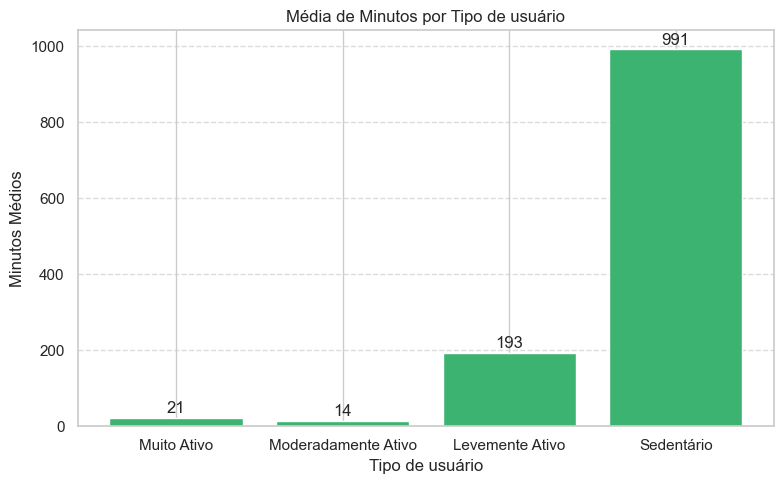

In [185]:
media_very_active = df['very_active_minutes'].mean()
media_fairly_active = df['fairly_active_minutes'].mean()
media_lightly_active = df['lightly_active_minutes'].mean()
media_sedentary = df['sedentary_minutes'].mean()

atividades = ['Muito Ativo', 'Moderadamente Ativo', 'Levemente Ativo', 'Sedentário']
medias = [media_very_active, media_fairly_active, media_lightly_active, media_sedentary]

plt.figure(figsize=(8,5))
bars = plt.bar(atividades, medias, color='mediumseagreen')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.title('Média de Minutos por Tipo de usuário')
plt.ylabel('Minutos Médios')
plt.xlabel('Tipo de usuário')
plt.ylim(0, max(medias) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


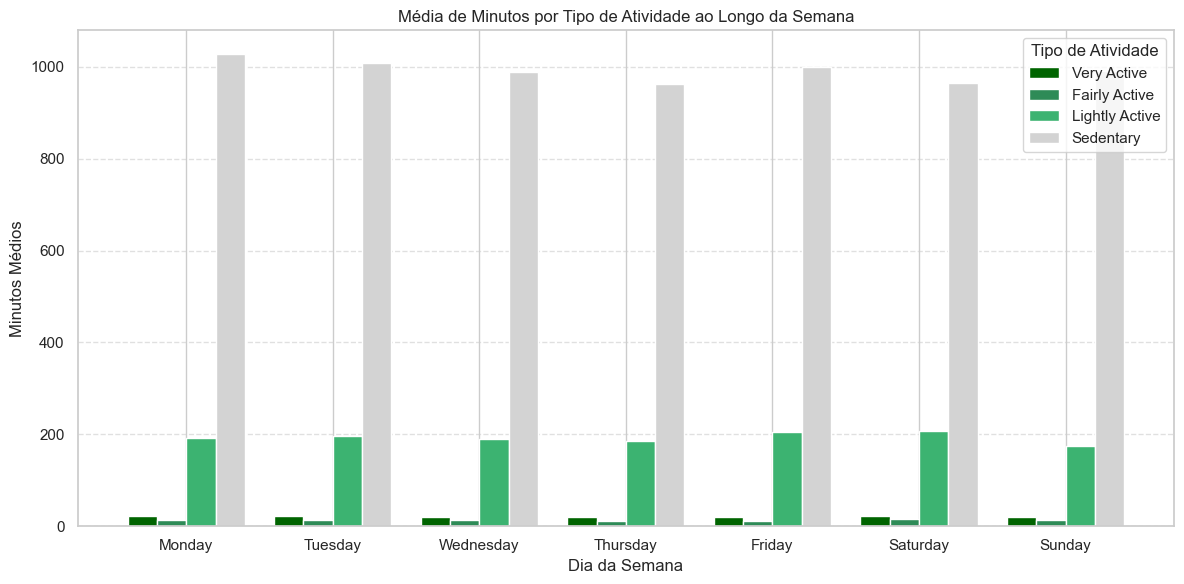

In [191]:
import matplotlib.pyplot as plt
media_por_dia = df.groupby('day_name')[[
    'very_active_minutes',
    'fairly_active_minutes',
    'lightly_active_minutes',
    'sedentary_minutes'
]].mean()

dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
media_por_dia = media_por_dia.reindex(dias_ordenados)

plt.figure(figsize=(12, 6))

atividades = ['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']
cores = ['darkgreen', 'seagreen', 'mediumseagreen', 'lightgray']
largura_barra = 0.2
x = range(len(media_por_dia))

for i, atividade in enumerate(atividades):
    plt.bar(
        [p + largura_barra * i for p in x],
        media_por_dia[atividade],
        width=largura_barra,
        label=atividade.replace('_minutes', '').replace('_', ' ').title(),
        color=cores[i]
    )

# Ajustes de eixo e rótulos
plt.xticks([p + largura_barra * 1.5 for p in x], dias_ordenados)
plt.ylabel('Minutos Médios')
plt.xlabel('Dia da Semana')
plt.title('Média de Minutos por Tipo de Atividade ao Longo da Semana')
plt.legend(title='Tipo de Atividade')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
